# Application on FRB hosts

In [4]:
# https://github.com/krittisharma/frb_host_sharma2024/blob/main/read_transients_data.py)
import numpy as np
import pandas as pd


def read_dsa_data(only_gold=True):
    """
    Reads DSA FRBs data published in Sharma+2024, 
    filters for 'sed_done?' == 'Y' and 'sample' == 'Gold', 
    and returns the filtered DataFrame.

    Parameters:
    ----------
    only_gold : bool, optional
        If True, filters for FRBs labeled as 'Gold' in addition to 
        'sed_done?' == 'Y' (default is True).

    Returns:
    -------
    dsa_frb s : DataFrame
        Filtered DataFrame containing DSA FRBs data.

    """
    # Read CSV file
    dsa_frbs = pd.read_csv("frbs_data/dsa_frbs.csv")
    
    if only_gold:
        dsa_frbs = dsa_frbs[np.logical_and(dsa_frbs["sed_done?"] == "Y", dsa_frbs["sample"] == "Gold")]
    else:
        dsa_frbs = dsa_frbs[dsa_frbs["sed_done?"] == "Y"]
    
    # Compute logarithmic errors for ssfr
    dsa_frbs["ssfr_errl"] = np.log10(dsa_frbs["ssfr"] + dsa_frbs["ssfr_errl"]) - np.log10(dsa_frbs["ssfr"])
    dsa_frbs["ssfr_erru"] = np.log10(dsa_frbs["ssfr"] + dsa_frbs["ssfr_erru"]) - np.log10(dsa_frbs["ssfr"])
    
    # Compute logarithm of ssfr
    dsa_frbs["ssfr"] = np.log10(dsa_frbs["ssfr"])
    
    return dsa_frbs


def read_chime_data():
    """
    Reads CHIME FRBs data from Bhardwaj+2023 and returns the DataFrame.

    Returns:
    -------
    chime_frbs : DataFrame
        DataFrame containing CHIME FRBs data.
    """
    chime_frbs = pd.read_csv("frbs_data/bhardwaj_et_al.csv")
    return chime_frbs


def fix_gordon_et_al_data_format(df):
    """
    Fixes the format of Gordon+2023 data by extracting numerical values
    from LaTeX-formatted strings and assigning them to appropriate 
    columns.
    """
    logMstar, logMstar_errl, logMstar_erru = [], [], []
    sfr_100Myr, sfr_100Myr_errl, sfr_100Myr_erru = [], [], []
    tm, tm_errl, tm_erru = [], [], []
    logzsol, logzsol_errl, logzsol_erru = [], [], []
    Av, Av_errl, Av_erru = [], [], []
    
    for i in range(len(df)):
        logMstar.append(float(str(df["log(M _*/M _sun)"][i])
                              .split("$")[1].split("_")[0].split("{")[1]
                              .split("}")[0]))
        logMstar_errl.append(float(str(df["log(M _*/M _sun)"][i])
                                  .split("$")[1].split("_")[1].split("{")[1]
                                  .split("}")[0]))
        logMstar_erru.append(float(str(df["log(M _*/M _sun)"][i])
                                  .split("$")[1].split("_")[1].split("{")[2]
                                  .split("}")[0]))
        sfr_100Myr.append(float(str(df["SFR_0-100 Myr"][i])
                                .split("$")[1].split("_")[0].split("{")[1]
                                .split("}")[0]))
        sfr_100Myr_errl.append(float(str(df["SFR_0-100 Myr"][i])
                                    .split("$")[1].split("_")[1].split("{")[1]
                                    .split("}")[0]))
        sfr_100Myr_erru.append(float(str(df["SFR_0-100 Myr"][i])
                                    .split("$")[1].split("_")[1].split("{")[2]
                                    .split("}")[0]))
        tm.append(float(str(df["t _m"][i])
                        .split("$")[1].split("_")[0].split("{")[1].split("}")[0]))
        tm_errl.append(float(str(df["t _m"][i])
                            .split("$")[1].split("_")[1].split("{")[1].split("}")[0]))
        tm_erru.append(float(str(df["t _m"][i])
                            .split("$")[1].split("_")[1].split("{")[2].split("}")[0])) 
        logzsol.append(float([df["log(Z _*/Z _sun)"][i][1] if df["log(Z _*/Z _sun)"][i][1]=="-" else "+"][0]
                             +str(df["log(Z _*/Z _sun)"][i])
                             .split("$")[1].split("_")[0].split("{")[1].split("}")[0]))
        logzsol_errl.append(float(str(df["log(Z _*/Z _sun)"][i])
                                 .split("$")[1].split("_")[1].split("{")[1]
                                 .split("}")[0]))
        logzsol_erru.append(float(str(df["log(Z _*/Z _sun)"][i])
                                 .split("$")[1].split("_")[1].split("{")[2]
                                 .split("}")[0])) 
        Av.append(float(str(df["A _V,old"][i])
                        .split("$")[1].split("_")[0].split("{")[1].split("}")[0]))
        Av_errl.append(float(str(df["A _V,old"][i])
                            .split("$")[1].split("_")[1].split("{")[1].split("}")[0]))
        Av_erru.append(float(str(df["A _V,old"][i])
                            .split("$")[1].split("_")[1].split("{")[2].split("}")[0])) 
    
    df["logMstar"] = logMstar
    df["logMstar_errl"] = logMstar_errl
    df["logMstar_erru"] = logMstar_erru
    df["sfr_100Myr"] = sfr_100Myr
    df["sfr_100Myr_errl"] = sfr_100Myr_errl
    df["sfr_100Myr_erru"] = sfr_100Myr_erru
    df["t_m"] = tm
    df["t_m_errl"] = tm_errl
    df["t_m_erru"] = tm_erru
    df["Av_old"] = Av
    df["Av_old_errl"] = Av_errl
    df["Av_old_erru"] = Av_erru
    df["logzsol"] = logzsol
    df["logzsol_errl"] = logzsol_errl
    df["logzsol_erru"] = logzsol_erru
    df["ssfr"] = np.log10((sfr_100Myr/(10**np.array(logMstar)))*(1e9)) # per Gyr
    df["ssfr_errl"] = np.log10(((np.array(sfr_100Myr)+np.array(sfr_100Myr_errl))/(10**(np.array(logMstar)+np.array(logMstar_erru))))*(1e9)) - np.array(df["ssfr"]) # per Gyr
    df["ssfr_erru"] = np.log10(((np.array(sfr_100Myr)+np.array(sfr_100Myr_erru))/(10**(np.array(logMstar)+np.array(logMstar_errl))))*(1e9)) - np.array(df["ssfr"]) # per Gyr

    return df



def read_askap_frbs():
    """
    Read and return Gordon+2023 FRB host galaxies data.

    Returns:
    -------
    askap_frbs : DataFrame
        A pandas DataFrame containing the ASKAP FRBs data with additional 
        rmag and rmag_err columns, excluding FRB 20121102A.
    """
    # Read the ASKAP FRBs data from a text file
    askap_frbs = pd.read_csv("frbs_data/gordon_et_al.txt", sep="\t")
    
    # Fix the data format using a custom function
    askap_frbs = fix_gordon_et_al_data_format(askap_frbs)

    # List of r-band magnitudes
    rmags = [23.73, 21.21, 16.17, 20.33, 21.68, 21.87, 22.16, 
             17.41, 22.15, 23.54, 20.34, 18.36, 21.05, 19.95, 
             17.86, 22.97, 19.47, 20.65, 17.17, 14.96, 19.64, 
             16.44, 21.19]
    
    # List of r-band magnitude errors
    rmag_errs = [0.14, 0.06, 0.03, 0.01, 0.05, 0.10, 0.06, 
                 0.002, 0.15, 0.15, 0.03, 0.003, 0.02, 0.01,
                 0.03, 0.04, 0.02, 0.03, 0.01, 0.01, 0.03, 
                 0.01, 0.08]
    
    # Add the rmag and rmag_err columns to the DataFrame
    askap_frbs["rmag"] = rmags
    askap_frbs["rmag_err"] = rmag_errs

    # Exclude FRB 20121102A and reset the index
    askap_frbs = askap_frbs[askap_frbs["FRB"] != "20121102A"].reset_index()

    return askap_frbs

In [2]:
import numpy as np
import matplotlib.pylab as plt

import logpdfs
import emcee_utils as mc
from gc_utils import get_gc_weighted_logpdf

/Users/asaf/Library/CloudStorage/OneDrive-weizmann.ac.il/Desktop/FRB/host-galaxies-stats/sample_nf_probability_density.py:67: SyntaxWarning: invalid escape sequence '\o'
  ax.set_xlabel('log(M/M$_{\odot}$)',fontsize=14)
/Users/asaf/Library/CloudStorage/OneDrive-weizmann.ac.il/Desktop/FRB/host-galaxies-stats/sample_nf_probability_density.py:68: SyntaxWarning: invalid escape sequence '\o'
  ax.set_ylabel('log(SFR/M$_{\odot}$/yr$^{-1}$)',fontsize=14)


### Load FRBs data

In [5]:
''' load FRB hosts data from Sharma et al. 2024 '''

dsa_frbs = read_dsa_data()
askap_frbs = read_askap_frbs()
chime_frbs = read_chime_data()  # added 'FRB' column manually, was not there in Sharma+24

dsa_frbs = dsa_frbs.rename(columns={'FRB_TNS_name': 'FRB', 'redshift': 'z'})
dsa_frbs['FRB'] = [x.lstrip('FRB ') for x in dsa_frbs['FRB']]

cols = ['FRB', 'z', 'logMstar', 'logMstar_erru', 'logMstar_errl', 'sfr_100Myr', 'sfr_100Myr_errl', 'sfr_100Myr_erru']

frb_hosts = pd.concat([dsa_frbs[cols], askap_frbs[cols], chime_frbs[cols]],
                      ignore_index=True)
frb_hosts = frb_hosts.rename(columns={
    'logMstar': 'Mstar',
    'logMstar_errl': 'Mstar_lowerr',
    'logMstar_erru': 'Mstar_uperr',
    'sfr_100Myr': 'SFR',
    'sfr_100Myr_erru': 'SFR_uperr',
    'sfr_100Myr_errl': 'SFR_lowerr',
})

frb_hosts['Mstar'] = 10 ** frb_hosts['Mstar']  # Mstar in M/M_\odot
frb_hosts['Mstar_lowerr'] *= -1  # lower errors should be positive
frb_hosts['SFR_lowerr'] *= -1

frb_hosts = frb_hosts[frb_hosts['z'] <= 0.7]  # constrain to lower z (exclude FRB20221029A)
frb_hosts = frb_hosts.reset_index()

### Initialize Leja trained flow

In [7]:
import sample_nf_probability_density as leja_utils
flow = leja_utils.load_nf()
prob_density = leja_utils.sample_density(flow,redshift_smoothing=True)

# import some useful variables from leja_utils to be used as global variables
for attr in ['mgrid', 'sfrgrid', 'mmin', 'mmax']:
    globals()[attr] = getattr(leja_utils, attr)

### Add helper functions

1. Add metallicity model
2. Add optical bias fix

In [ ]:
''' Logic for optical selection and metallicity dependence, based on Sharma et al. 2024'''
import astropy.units as u
from scipy.special import erf
from astropy.cosmology import Planck18 as cosmo


# Optical bias constants
AB_ZERO_POINT = 3631  # Jansky, for AB magnitude
JY_TO_CGI = 1e-23  # Jy to erg/s/cm^2
f_r = 3e10*1400e-8/(6215e-8**2)  # f_nu = c * delta(f_lam) / lam**2 for r-band
F_r = 10**(23.5 / -2.5) * AB_ZERO_POINT * JY_TO_CGI * f_r  # flux in erg/s/cm^2 for M=23.5
SOLAR_L = 4e33  # erg/s

# Metalicity dependence
# https://github.com/krittisharma/frb_host_sharma2024/blob/main/frbs_are_biased_SF_tracer.ipynb
M_C_SHARMA = 8.979591836734693
BETA_SHARMA = 37275.93720314938


def _get_sigma_for_z(z):
    ''' returns σ for the log(M/L) ∼ N (0, σ) , using Sharma et al. methods'''
    if z<=0.2:
        return 0.2
    if z<=0.4:
        return 0.26
    if z<=0.7:
        return 0.3
    raise ValueError("z>0.7 is not supported for optical bias selection")


def sigmoid(x, mean, beta=1):
    """
    Taken from Sharma et al. 2024
    Compute the sigmoid function.

    Parameters:
    - x: Input array
    - mean: Mean or midpoint of the sigmoid
    - beta: Slope parameter (default is 1)

    Returns:
    - Array of sigmoid values evaluated at x
    """
    return 1 / (1 + np.exp(-beta*(x-mean)))


def optical_bias_logpdf(logpdf, selection_factor):
    """Apply optical selection bias to logpdf.
    
    Parameters
    ----------
    logpdf : callable
        Base log probability density function
    selection_factor : array-like
        Selection factors for mass grid

    Returns
    -------
    callable
        Modified logpdf with selection bias
    
    Notes
    -----
    Selection bias drops galaxies with r-band > 23.5 magnitude by returning -inf
    """

    def logpdf_with_selection(theta):
        mass, _ = theta
        p = logpdf(theta)
        if np.isinf(p):
            return p
        midx = np.abs(mgrid-mass).argmin()
        return p + selection_factor[midx]  # addition because selection_factor is in log

    return logpdf_with_selection

def metallicity_logpdf(logpdf):
    """Apply metallicity correction to logpdf.
    
    Parameters
    ----------
    logpdf : callable
        Base log probability density function
        
    Returns
    -------
    callable
        Modified logpdf with metallicity correction
    """

    def logpdf_with_metallicity(theta):
        mass, _ = theta
        p = logpdf(theta)
        if np.isinf(p):
            return p
        midx = np.abs(mgrid-mass).argmin()
        return p + metallicity_sigmoid[midx]

    return logpdf_with_metallicity

# Compute selection factors for all hosts redshift
# computed in advance for all z, instead of during each call to lnprior_optical_bias
z_to_selection_factor = {}
mgrid = leja_utils.mgrid
metallicity_sigmoid = np.log(sigmoid(mgrid, M_C_SHARMA, BETA_SHARMA))

extra_z = [0.25, 0.279, 0.3, 0.478, 0.5]  # z values not within frb_hosts, to plot for examples
for z in frb_hosts['z'].tolist() + extra_z:
    sigma = _get_sigma_for_z(z)
    lum_distance = cosmo.luminosity_distance(z).to(u.cm).value  # cm
    x = mgrid - np.log10(4 *np.pi * lum_distance ** 2 * F_r / SOLAR_L)

    selection_factor = 0.5 * (1+erf(x/np.sqrt(2)/sigma))
    z_to_selection_factor[z] = np.log(selection_factor)


/var/folders/9v/9mgg2nhs31x_zn1r4181_xym0000gn/T/ipykernel_56568/4268941491.py:44: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-beta*(x-mean)))
/var/folders/9v/9mgg2nhs31x_zn1r4181_xym0000gn/T/ipykernel_56568/4268941491.py:105: RuntimeWarning: divide by zero encountered in log
  metallicity_sigmoid = np.log(sigmoid(mgrid, M_C_SHARMA, BETA_SHARMA))


In [8]:
#######################################################
## Add relevant functions to include optical lnprior ##
#######################################################

def get_wlogpdf_w_opt(z, prob_density, a, b):
    """
    Get a weighted logpdf function with optical bias lnprior

    Parameters:
    ----------
    - z: Redshift
    - prob_density: used for logpdfs.get_logpdf, see doc
    - a, b: coefficients for mass, sfr respectively

    Returns:
    ----------
    - weighted logpdf function with optical bias lnprior
    """
    logpdf = logpdfs.get_logpdf(z, prob_density,
                                continuity=True)  # change to False for conservative set
    # optical bias has to be added before weighting
    logpdf_opt = optical_bias_logpdf(logpdf, z_to_selection_factor[z])
    return logpdfs.get_weighted_logpdf(logpdf_opt, a, b)


def get_gc_logpdf_w_opt(z, prob_density):
    """
    Get a Globular Cluster-weighted logpdf function with optical bias lnprior

    Parameters:
    ----------
    - z: Redshift
    - prob_density: used for logpdfs.get_logpdf, see doc

    Returns:
    ----------
    - gc-weighted logpdf function with optical bias lnprior
    """
    logpdf = logpdfs.get_logpdf(z, prob_density,
                                continuity=True)  # change to False for conservative set
    # optical bias has to be added before weighting
    logpdf_opt = optical_bias_logpdf(logpdf, z_to_selection_factor[z])
    return get_gc_weighted_logpdf(logpdf_opt)


def get_metallicity_logpdf(z, prob_density):
    """
    Get a metallicity-weighted logpdf function with optical bias lnprior

    Parameters:
    ----------
    - z: Redshift
    - prob_density: used for logpdfs.get_logpdf, see doc

    Returns:
    ----------
    - metallicity-weighted logpdf function with optical bias lnprior
    """
    sfr_w_logpdf = get_wlogpdf_w_opt(z, prob_density, 0, 1)
    return metallicity_logpdf(sfr_w_logpdf)



def create_z_to_logpdf_w_opt(host_galaxies, prob_density, a, b):
    """Create a map of redshift to logpdf function, with optical selection bias.
    
    Parameters
    ----------
    host_galaxies : pandas.DataFrame
        host galaxy data, with a column 'z' for redshift
    prob_density : used for logpdfs.get_logpdf, see doc
    - a, b: coefficients for mass, sfr respectively
        
    Returns
    -------
    dict
        Maps redshift to a weighted logpdf function
    """
    z_to_logpdf = {z: 
                   get_wlogpdf_w_opt(z, prob_density, a, b)
                   for z in host_galaxies['z']} 
    return z_to_logpdf


def create_z_to_logpdf_metallicty(host_galaxies, prob_density):
    """Create a map of redshift to an sfr-weighted logpdf, with optical correction
    and with metallicity correction.
    
    Parameters
    ----------
    host_galaxies : pandas.DataFrame
        host galaxy data, with a column 'z' for redshift
    prob_density : used for logpdfs.get_logpdf, see doc
        
    Returns
    -------
    dict
        Maps redshift to a metallicity-weighted logpdf function
    """
    z_to_logpdf = {z: 
                   get_metallicity_logpdf(z, prob_density)
                   for z in host_galaxies['z']} 
    return z_to_logpdf

## Example Usage ##

/var/folders/9v/9mgg2nhs31x_zn1r4181_xym0000gn/T/ipykernel_55925/417443890.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


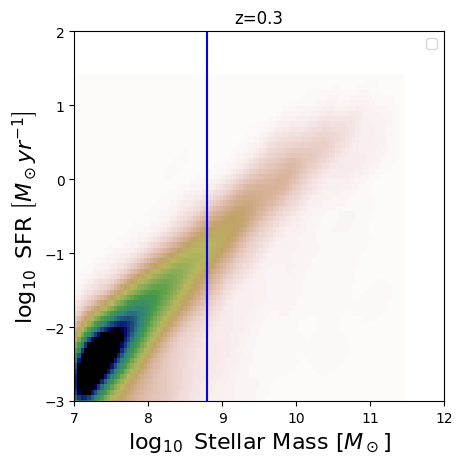

In [ ]:
"""
Example:
Generate samples with continuity model and optical selection bias,
plot results with FRB host galaxies
Note: the background density represents a single redshift, whereas each host-
      galaxy has different z, and plotted here just for a crude comparison.
"""
z = 0.15  # np.median(frb_hosts['z'])  # 0.2417
import importlib
importlib.reload(logpdfs)
# Create logpdf
# logpdf = logpdfs.get_weighted_logpdf(
#     logpdfs.get_logpdf(z, prob_density), 1, 0)  # mass-weighted, no optical lnprior
# logpdf = get_wlogpdf_w_opt(z, prob_density, 1, 0)  # mass-weighted with optical lnprior
# logpdf = get_wlogpdf_w_opt(z, prob_density, 0, 1)  # sfr-weighted with optical lnprior
# logpdf = get_gc_logpdf_w_opt(z, prob_density)  # gc-weighted with optical lnprior
# logpdf = get_metallicity_logpdf(z, prob_density) # metallicity-weighted
logpdf = logpdfs.get_logpdf(z, prob_density, continuity=True)  # simple, unweighted logpdf
logpdf = logpdfs.get_logpdf(z, prob_density, continuity=True, redshift_evolution=False)  # simple, unweighted logpdf
# wlogpdf = logpdfs.get_weighted_logpdf(logpdf, 1, 0)  # mass-weighted, no optical lnprior

# Generate samples
logpdf_samples = mc.get_samples(logpdf, steps=1000)

# Plot samples
ax,_, _ = mc.plot_from_samples(logpdf_samples)
mthres = leja_utils.cosmos15_mass_completeness(z)
ax.axvline(mthres, color='blue')
# Further customization
# frb_hosts = frb_hosts[frb_hosts['z']<=0.2].reset_index()  # for metalicity
# ax.plot(np.log10(frb_hosts['Mstar']), np.log10(frb_hosts['SFR']),
#         '*', color='red', markersize=5, label="FRB host galaxies")
ax.set_xlim([7, 12])
ax.set_ylim([-3,2])
ax.set_xlabel(r"$\log_{10}$" + " Stellar Mass " + r"$\left[M_\odot\right]$", fontsize=16)
ax.set_ylabel(r"$\log_{10}$" + " SFR " + r"$\left[M_\odot yr^{-1}\right]$", fontsize=16)
ax.set_title(f"z={z}")
ax.legend()
plt.show()




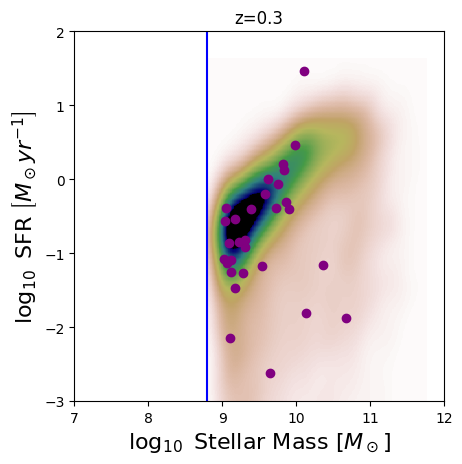

In [ ]:
"""
create a gif of emcee samplers
"""
from scipy.stats import gaussian_kde
z = 0.3  # np.median(frb_hosts['z'])  # 0.2417

# Create logpdf
logpdf = logpdfs.get_logpdf(z, prob_density, continuity=False)  # simple, unweighted logpdf

# Generate samples
walker_paths = mc.get_samples(logpdf, steps=1000, flat=False)
logpdf_samples = walker_paths.reshape(-1, walker_paths.shape[-1])


# Plot samples
m1 = logpdf_samples[:,0]  # masses
m2 = logpdf_samples[:,1]  # SFRs

xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()
extent = [xmin, xmax, ymin, ymax]

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])  # 2x10000
values = np.vstack([m1, m2]) # 2xN_samples
kernel = gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)  # 100x100

fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
            extent=extent, animated=True,
            vmin=np.percentile(Z, 5), vmax=np.percentile(Z, 99))

mthres = leja_utils.cosmos15_mass_completeness(z)
ax.axvline(mthres, color='blue')
# Further customization
# frb_hosts = frb_hosts[frb_hosts['z']<=0.2].reset_index()  # for metalicity
# ax.plot(np.log10(frb_hosts['Mstar']), np.log10(frb_hosts['SFR']),
#         '*', color='red', markersize=5, label="FRB host galaxies")
ax.set_xlim([7, 12])
ax.set_ylim([-3,2])
ax.set_xlabel(r"$\log_{10}$" + " Stellar Mass " + r"$\left[M_\odot\right]$", fontsize=16)
ax.set_ylabel(r"$\log_{10}$" + " SFR " + r"$\left[M_\odot yr^{-1}\right]$", fontsize=16)
ax.set_title(f"z={z}")

scat = ax.plot([], [], 'o', color='purple')[0]
def update(frame):
    scat.set_data(walker_paths[frame, :, 0], walker_paths[frame, :, 1])
    return scat,

ani = animation.FuncAnimation(fig, update, frames=1000, interval=100, blit=True)
ani.save("emcee_walkers_leja.gif", writer=PillowWriter(fps=10))


In [55]:
frb_hosts[frb_hosts['z'] > 0.6]

,index,FRB,z,Mstar,Mstar_uperr,Mstar_lowerr,SFR,SFR_lowerr,SFR_uperr
24,24,20220418A,0.6213,1.810923e+10,0.0236,0.0243,1.3122,0.1297,0.1539


In [446]:
# Example: calculate p90, pnom
frb_values = np.vstack([np.log10(frb_hosts['Mstar']) ,np.log10(frb_hosts['SFR']), frb_hosts['z']])
z_to_logpdf = logpdfs.create_z_to_logpdf(frb_hosts, prob_density, 1, 0)  # mass-weighted
frbs_likelihood = mc.calc_weighted_likelihood(z_to_logpdf, frb_values.T)
p90, pnom, _, _ = mc.calc_p90(frb_hosts, z_to_logpdf, frbs_likelihood)
print(p90, pnom)

Generating samples for each redshift: 100%|██████████| 51/51 [00:19<00:00,  2.64hosts/s]
Calculating likelihoods based on halfnorms values: 100%|██████████| 10000/10000 [00:05<00:00, 1911.08it/s]

0.10678125 0.096


## Figure 1

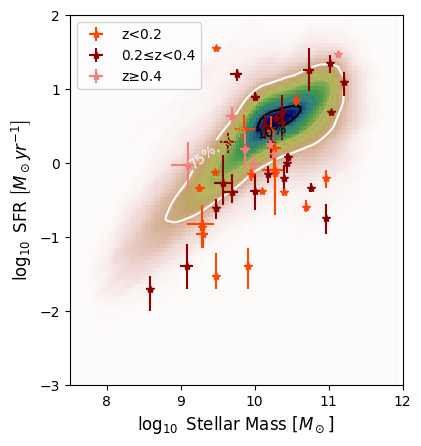

In [857]:
''' Figure 1 '''
from scipy.interpolate import interp1d

z = 0.3  # np.median(frb_hosts['z'])  # 0.2417

# Create logpdf
# logpdf = get_wlogpdf_w_opt(z, prob_density, 1, 0)  # mass-weighted
logpdf = get_wlogpdf_w_opt(z, prob_density, 0, 1)  # sfr-weighted
# logpdf = get_wlogpdf_w_opt(z, prob_density, 1, 10**9.62)  # a/b peak
# logpdf = get_gc_logpdf_w_opt(z, prob_density)  # gc-weighted

# Generate samples
samples = mc.get_samples(logpdf)
ax, Z, extent = mc.plot_from_samples(samples)

# Add probability contours
steps = 1000
Z = Z/Z.sum()
p = np.linspace(0, Z.max(), steps)
integral_gt_p = ((Z >= p[:,None,None])*Z).sum(axis=(1,2))
f = interp1d(integral_gt_p, p)
p_countours = f(np.array([0.75, 0.5, 0.25, 0.1]))
cont = ax.contour(Z.T, p_countours, cmap=plt.cm.gist_earth_r,
                  extent=extent)
fmt = {}
strs = ['75%,', '50%', '25%', '10%']
for l, s in zip(p_countours, strs):
    fmt[l] = s
ax.clabel(cont, fmt=fmt)

# Define z ranges and colors
z_ranges = [(0, 0.2), (0.2, 0.4), (0.4, np.inf)]
z_labels = ['z<0.2', '0.2≤z<0.4', 'z≥0.4']
colors = ['orangered', 'darkred', 'lightcoral']  # Light red, dark red, pink

# Plot each z range separately
for (z_min, z_max), color, label in zip(z_ranges, colors, z_labels):
    mask = (frb_hosts['z'] >= z_min) & (frb_hosts['z'] < z_max)
    if not any(mask):
        continue
        
    ax.errorbar(np.log10(frb_hosts.loc[mask, 'Mstar']), 
                np.log10(frb_hosts.loc[mask, 'SFR']),
                yerr=np.array([sfr_lowerr, sfr_uperr])[:, mask],  # TODO: fix! calculate sfr_lowerr
                xerr=np.array([frb_hosts['Mstar_lowerr'], 
                              frb_hosts['Mstar_uperr']])[:, mask],
                fmt='*',
                color=color,
                ecolor=color,
                label=label)

ax.set_xlim([7.5, mmax])
ax.set_ylim([-3, sfrmax])
ax.set_xlabel(r"$\log_{10}$" + " Stellar Mass " + r"$\left[M_\odot\right]$", fontsize=12)
ax.set_ylabel(r"$\log_{10}$" + " SFR " + r"$\left[M_\odot yr^{-1}\right]$", fontsize=12)
ax.legend()
plt.savefig('Figures/Figure1_sfr.pdf', bbox_inches='tight', transparent=True)

## Table 3

In [880]:
''' Table 3 '''

# Create logpdf
# z_to_logpdf = create_z_to_logpdf_w_opt(frb_hosts, prob_density, 1, 0)  # mass-weighted with optical lnprior
# z_to_logpdf = create_z_to_logpdf_w_opt(frb_hosts, prob_density, 0, 1)  # sfr-weighted with optical lnprior
# z_to_logpdf = {z: get_gc_logpdf_w_opt(z, prob_density)
#                for z in frb_hosts['z']}  # gc-weighted with optical lnprior

# frb_hosts = frb_hosts[frb_hosts['Mstar'] > 10**M_C_SHARMA].reset_index()  # remove lower-masses (20210117A)
frb_hosts = frb_hosts[frb_hosts['z']<=0.2].reset_index()  # perform metallicity weighted only on z<=0.2
z_to_logpdf = create_z_to_logpdf_metallicty(frb_hosts, prob_density)  # metallicity-weighted

frb_values = np.vstack([np.log10(frb_hosts['Mstar']),
                        np.log10(frb_hosts['SFR']),
                        frb_hosts['z']])
frbs_nominal_likelihood = mc.calc_weighted_likelihood(z_to_logpdf, frb_values.T)
p90_vals = []
p_nom_vals = []
for _ in range(5):
    
    p_90, p_nom, _, _ = mc.calc_p90(frb_hosts, z_to_logpdf, frbs_nominal_likelihood)
    p90_vals.append(p_90)
    p_nom_vals.append(p_nom)

print("p90 average", np.average(p90_vals), "std", np.std(p90_vals))
print("pnom average", np.average(p_nom_vals), "std", np.std(p_nom_vals))

# Print to use later for Figure 3 infinity-points (mass-weighted, sfr-weighted)
print(p90_vals)
print(p_nom_vals)

Generating samples for each redshift: 100%|██████████| 20/20 [00:11<00:00,  1.67hosts/s]


p90 average 0.01521875 std 0.003433463539197701
pnom average 0.0099 std 0.002227877352997691
[np.float64(0.014687500000000001), np.float64(0.01459375), np.float64(0.010906250000000001), np.float64(0.02146875), np.float64(0.0144375)]
[np.float64(0.00990625), np.float64(0.00978125), np.float64(0.0071875), np.float64(0.01390625), np.float64(0.00871875)]


In [788]:
''' Conservative set - Table 3'''

high_z = frb_hosts[frb_hosts['z'] >= 0.25]
high_m = high_z[np.log10(high_z['Mstar']) > leja_utils.cosmos15_mass_completeness(high_z['z'])]

conservative_hosts = high_m.reset_index()

# run Table 3 cell with coservative_hosts
# REMINDER - add get_logpdf(...,continuity=False) in get_wlogpdf_w_opt
#            and also in get_gc_logpdf_w_opt when doing gc-weighted
#            and also in get_metallicity_logpdf_w_opt when doing metallicity-weighted

# Create logpdf
z_to_logpdf = create_z_to_logpdf_w_opt(conservative_hosts, prob_density, 1, 0)  # mass-weighted with optical lnprior
# z_to_logpdf = create_z_to_logpdf_w_opt(conservative_hosts, prob_density, 0, 1)  # sfr-weighted with optical lnprior
# z_to_logpdf = {z: get_gc_logpdf_w_opt(z, prob_density)
#                for z in conservative_hosts['z']}  # gc-weighted with optical lnprior
# z_to_logpdf = create_z_to_logpdf_metallicty(conservative_hosts, prob_density)  # metallicity-weighted

frb_values = np.vstack([np.log10(conservative_hosts['Mstar']),
                        np.log10(conservative_hosts['SFR']),
                        conservative_hosts['z']])
frbs_nominal_likelihood = mc.calc_weighted_likelihood(z_to_logpdf, frb_values.T)
p90_vals = []
p_nom_vals = []

# Calculate p90 and pnom 5 times
for _ in range(5):
    
    p_90, p_nom, _, _ = mc.calc_p90(conservative_hosts, z_to_logpdf, frbs_nominal_likelihood)
    p90_vals.append(p_90)
    p_nom_vals.append(p_nom)

print("p90 average", np.average(p90_vals), "std", np.std(p90_vals))
print("pnom average", np.average(p_nom_vals), "std", np.std(p_nom_vals))

print(p90_vals)
print(p_nom_vals)


Generating samples for each redshift: 100%|██████████| 23/23 [00:10<00:00,  2.16hosts/s]


p90 average 0.23251249999999998 std 0.01403946168394643
pnom average 0.212975 std 0.015072862099647831
[np.float64(0.23559375000000002), np.float64(0.2556875), np.float64(0.23375), np.float64(0.21331250000000002), np.float64(0.22421875000000002)]
[np.float64(0.21571875000000001), np.float64(0.237375), np.float64(0.21571875000000001), np.float64(0.19175), np.float64(0.2043125)]


## Figure 2

Generating samples for each redshift: 100%|██████████| 51/51 [00:33<00:00,  1.54hosts/s]


90% conf p-value: 0.0270625
nominal p-value: 0.02359375


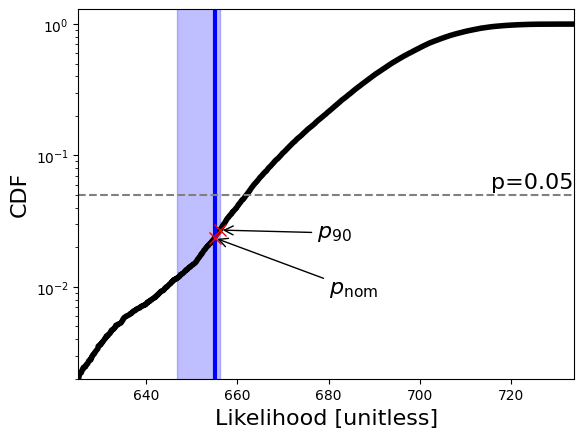

In [1142]:
''' Figure 2 '''
import matplotlib.patches as patches

# Create z to logpdf
# z_to_logpdf = create_z_to_logpdf_w_opt(frb_hosts, prob_density, 1, 0)  # mass-weighted with optical lnprior
# z_to_logpdf = create_z_to_logpdf_w_opt(frb_hosts, prob_density, 0, 1)  # sfr-weighted with optical lnprior
z_to_logpdf = {z: get_gc_logpdf_w_opt(z, prob_density)
               for z in frb_hosts['z']}  # gc-weighted with optical lnprior

frb_values = np.vstack([np.log10(frb_hosts['Mstar']),
                        np.log10(frb_hosts['SFR']),
                        frb_hosts['z']])

# Calculate p_90 and p_nom        
frbs_nominal_likelihood = mc.calc_weighted_likelihood(z_to_logpdf, frb_values.T)
p_90, p_nom, samples_cdf, lklhds_cdf = mc.calc_p90(frb_hosts, z_to_logpdf, frbs_nominal_likelihood)


# Add a rectangle from 10% to 90%
bottom, top = lklhds_cdf.y[1], lklhds_cdf.y[-1]
left, right = np.percentile(lklhds_cdf.x, [10, 90])
rect = patches.Rectangle((left, bottom), right - left,
                         2 * top - bottom, # because plotting with ylim<2*tpo
                         color='blue')  
rect.set_alpha(0.25)

ax = plt.gca()
ax.plot(samples_cdf.x, samples_cdf.y, color='black', linewidth=4)
ax.add_patch(rect)
ax.set_yscale('log', nonpositive='clip')

# zoom-in to interesting part
ax.set_ylim([2e-3, 1.3])
start_x = np.interp(2e-3, samples_cdf.y, samples_cdf.x)
ax.set_xlim([start_x, samples_cdf.x[-1]])

# Nominal pvalue line
ax.axvline(frbs_nominal_likelihood, color='blue', label='FRBs nominal likelihood', linewidth=3)

# p=0.05 line
ax.axhline(0.05, color='grey', linestyle='--')
ax.annotate('p=0.05', fontsize=16,
            xy=(samples_cdf.x[-1], 0.05),
            textcoords="offset points", xytext=(-60, 5))  # change manually 

# draw intesection points and annotate
ax.plot(frbs_nominal_likelihood, p_nom,
        marker='x', markersize=8, color='red')
ax.annotate(r'$p_{\rm nom}$',
            xy=(frbs_nominal_likelihood, p_nom), xycoords='data', fontsize=16,
            xytext=(100, -40), textcoords='offset points',  # change manually
            arrowprops=dict(arrowstyle="->"),
            horizontalalignment='center')

ax.plot(right, p_90, marker='x', markersize=8, color='red')
ax.annotate(r'$p_{90}$',
            xy=(right, p_90), xycoords='data',  fontsize=16,
            xytext=(70, -5), textcoords='offset points',  # change manually
            arrowprops=dict(arrowstyle="->"),
            horizontalalignment='left')

plt.xlabel('Likelihood [unitless]', fontsize=16)
plt.ylabel('CDF', fontsize=16)

plt.savefig('Figures/Figure2_gc.pdf', bbox_inches='tight', transparent=True)
print('90% conf p-value:', p_90)
print('nominal p-value:', p_nom)

## Figure 3 ##

In [585]:
from tqdm.notebook import tqdm

''' a-b with p<90% (for Figure 3) '''
N_AVG_PER_AB = 3

log_ab_frac = np.linspace(-15, -6, 50)  # ratio between log10(a/b)
frb_values = np.vstack([np.log10(frb_hosts['Mstar']),
                        np.log10(frb_hosts['SFR']),
                        frb_hosts['z']])

ab_p90_pvals = []
ab_pnom_pvals = []
ab_p90_errs = []  # list of attemps per ab (length is len(ab_pvals), each element is a list of N_AVG_PER_AB)
ab_pnom_errs = []

print("This might take a while. About 2 minutes per a/b ratio")
for log_f in tqdm(log_ab_frac, desc="Calculating a/b ratios"):
    # print("Starting", np.where(log_ab_frac == log_f)[0][0], "/", len(log_ab_frac))
    f = 10 ** log_f
    # solutiosn to a/b=f and a+b=1
    a = f / (1+f)
    b = 1 / (1+f)
    
    z_to_logpdf = create_z_to_logpdf_w_opt(frb_hosts, prob_density, a, b)
    frbs_nominal_likelihood = mc.calc_weighted_likelihood(z_to_logpdf, frb_values.T)

    p90_per_ab = []
    pnom_per_ab = []
    for _ in tqdm(range(N_AVG_PER_AB), desc=f"Averaging result for a/b ratio",
                  leave=False):
        try:
            mc.TQDM_DISABLE = True
            p90, pnom, _, _ = mc.calc_p90(frb_hosts, z_to_logpdf, frbs_nominal_likelihood)
            mc.TQDM_DISABLE = False
            p90_per_ab.append(p90)
            pnom_per_ab.append(pnom)
        except TypeError as err:
            print(err)
            continue
    
    ab_p90_errs.append(p90_per_ab)        
    ab_pnom_errs.append(pnom_per_ab)        
    ab_p90_pvals.append(np.average(p90_per_ab))
    ab_pnom_pvals.append(np.average(pnom_per_ab))   

with open('ab_frac_26_02_25.csv', 'w') as f:
    f.write('log_ab,pval,errs\n')
    f.writelines(['{},{},{},{},{}\n'.format(log_ab_frac[i], ab_p90_pvals[i], ab_pnom_pvals[i],
                                            ab_p90_errs[i],ab_pnom_errs[i]) for i in range(len(log_ab_frac))])


This might take a while. About 2 minutes per a/b ratio


Calculating a/b ratios:   0%|          | 0/50 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

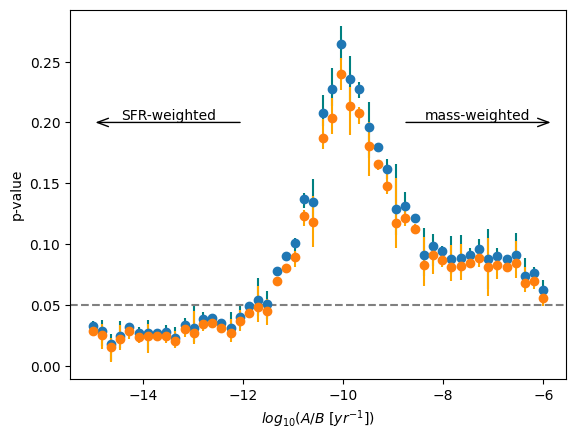

In [588]:
''' Figure 3 setup '''
import matplotlib.patches as mpatches

def ab_vals_from_csv(csv_path):
    '''
    Serialize values from csv
    :param csv_path: path to csv file
    :return: tuple of log_ab_frac, ab_pvals and 
    '''
    log_ab_frac = []
    p90_vals = []
    pnom_vals = []
    errs_90 = []
    errs_nom = []

    with open(csv_path) as f:
        f.readline()  # headers line
        for l in f.readlines():
            # frac, p90,pnom,[np.float64(p90_1), np.float64(p90_2), np.float64(p90_3)],
            #                [np.float64(pnom_1), np.float64(pnom_2), np.float64(pnom_3)]\n
            frac, p90, pnom, *errs = l.split(",")
            frac = float(frac)
            p90 = float(p90)
            pnom = float(pnom)
            err_90 = [float(errs[0].strip('[np.float64(').rstrip(')')),
                      float(errs[1].strip(' np.float64(').rstrip(')')),
                      float(errs[2].strip(' np.float64(').rstrip(')]'))]
            err_nom = [float(errs[3].strip('[np.float64(').rstrip(')')),
                       float(errs[4].strip(' np.float64(').rstrip(')')),
                       float(errs[5].strip(' np.float64(').rstrip(')]\n'))]
        
            log_ab_frac.append(frac)
            p90_vals.append(p90)
            pnom_vals.append(pnom)
            errs_90.append(err_90)
            errs_nom.append(err_nom)

    return log_ab_frac, p90_vals, pnom_vals, errs_90, errs_nom

fracs, pvals_90, pvals_nom, errs_90, errs_nom = ab_vals_from_csv('ab_frac_26_02_25.csv')

yerr_90 = np.transpose([[max(errs_90[i])-p,p-min(errs_90[i])] for i,p in enumerate(pvals_90)])
yerr_nom = np.transpose([[max(errs_nom[i])-p,p-min(errs_nom[i])] for i,p in enumerate(pvals_nom)])

ax = plt.gca()
plt.errorbar(fracs, pvals_90, yerr_90, fmt='o', ecolor='teal')
plt.errorbar(fracs, pvals_nom, yerr_nom, fmt='o', ecolor='orange')


plt.xlabel('$log_{10}(A/B~[yr^{-1}])$')
plt.ylabel('p-value')
plt.axhline(0.05, color='grey', linestyle='--')

# add mass-weighted and sfr-weighted direction arrows
sfr_arrow = mpatches.FancyArrowPatch((-12, 0.2), (-15, 0.2),
                                     arrowstyle='->,head_width=.15',
                                     mutation_scale=20)
mass_arrow = mpatches.FancyArrowPatch((-8.8, 0.2), (-5.8, 0.2),
                                      arrowstyle='->,head_width=.15',
                                      mutation_scale=20)
ax.add_patch(mass_arrow)
ax.add_patch(sfr_arrow)
ax.annotate("mass-weighted", (.5, .5), xycoords=mass_arrow, ha='center', va='bottom')
ax.annotate("SFR-weighted", (.5, .5), xycoords=sfr_arrow, ha='center', va='bottom')

#plt.savefig('Figures/Figure3_no_inf_points.pdf', bbox_inches='tight', transparent=True)

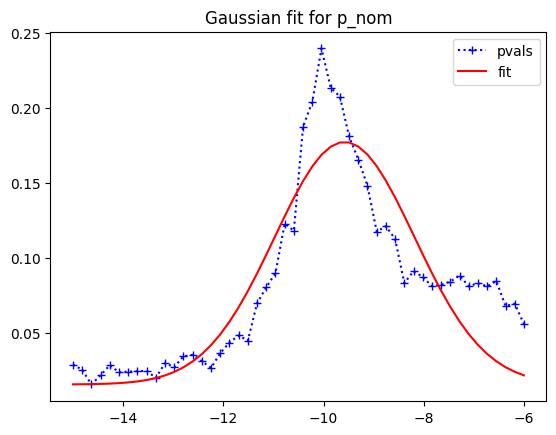

mean: -9.579318980079254
cov: 1.3975804032652681


In [1164]:
''' Gaussian fit Figure 3 '''
from scipy.optimize import curve_fit

# replace between pvals_90 and pvals_nom, pick which ones to fit to
curr_pvals = pvals_nom  #pvals_90
n = len(curr_pvals)
mean = sum(np.array(fracs) * np.array(curr_pvals))/n
sigma = np.sqrt(sum(curr_pvals*(fracs-mean)**2)/n)

def gauss(x,a,x0,sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2)) + np.min(curr_pvals)
    

popt,pcov = curve_fit(gauss, fracs, curr_pvals, p0=[1, mean, sigma])

plt.plot(fracs, curr_pvals, 'b+:', label='pvals')
plt.plot(fracs, gauss(fracs, *popt), 'r-', label='fit')
plt.legend()
plt.title('Gaussian fit for p_nom')  # repalce title between p<90% and p_nom
plt.show()
print('mean:', popt[1])
print('cov:', popt[2])

In [604]:
''' Figure 3 - add mass-weighted and sfr-weighted points to a/b plot '''

# Values taken from Table 3 cell
mass_weighted_errs_90 = [np.float64(0.07540625), np.float64(0.06790625), np.float64(0.081375), np.float64(0.07643749999999999), np.float64(0.08540625)]
mass_weighted_errs_nom = [np.float64(0.0675), np.float64(0.0613125), np.float64(0.07546875), np.float64(0.0710625), np.float64(0.07853125)]
sfr_weighted_errs_90 = [np.float64(0.0095), np.float64(0.029437500000000002), np.float64(0.029781250000000002), np.float64(0.037406249999999995), np.float64(0.03215625)]
sfr_weighted_errs_nom = [np.float64(0.0073750000000000005), np.float64(0.025718750000000002), np.float64(0.0260625), np.float64(0.03328125), np.float64(0.02875)]

# pvals
mass_nom = np.average(mass_weighted_errs_nom)
mass_90 = np.average(mass_weighted_errs_90)
sfr_nom = np.average(sfr_weighted_errs_nom)
sfr_90 = np.average(sfr_weighted_errs_90)

# error bars
mass_yerr_nom = np.transpose([max(mass_weighted_errs_nom)-mass_nom,mass_nom-min(mass_weighted_errs_nom)])
mass_yerr_90 = np.transpose([max(mass_weighted_errs_90)-mass_90,mass_90-min(mass_weighted_errs_90)])
sfr_yerr_nom = np.transpose([max(sfr_weighted_errs_nom)-sfr_nom,sfr_nom-min(sfr_weighted_errs_nom)])
sfr_yerr_90 = np.transpose([max(sfr_weighted_errs_90)-sfr_90,sfr_90-min(sfr_weighted_errs_90)])

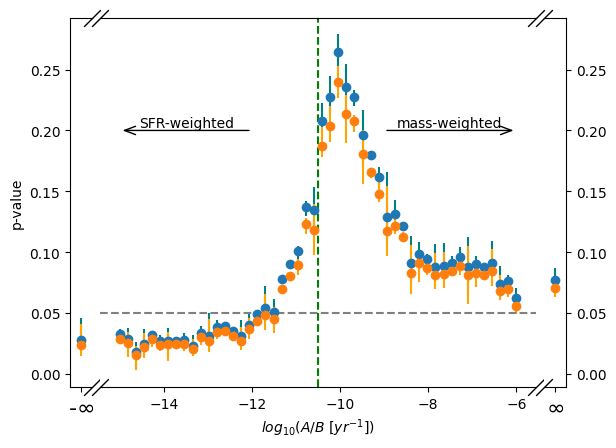

In [1160]:
''' Figure 3 - with broken axes '''

fig = plt.figure()
gs = plt.GridSpec(1, 3, width_ratios=[1, 20, 1])

minf_ax = fig.add_subplot(gs[0])
mid_ax = fig.add_subplot(gs[1], sharey=minf_ax)
inf_ax = fig.add_subplot(gs[2], sharey=minf_ax)

# plot the same data on both axes
mid_ax.errorbar(fracs, pvals_90, yerr_90, fmt='o', ecolor='teal')
mid_ax.errorbar(fracs, pvals_nom, yerr_nom, fmt='o', ecolor='orange')

# plot sfr weighted
minf_ax.errorbar(0, sfr_90, yerr=sfr_yerr_90.reshape((2,1)), fmt='o', ecolor='teal')
minf_ax.errorbar(0, sfr_nom, yerr=sfr_yerr_nom.reshape((2,1)), fmt='o', ecolor='orange')
minf_ax.set_xticks([0], [r"-$\infty$"], fontsize=16)

# plot mass weighted
inf_ax.errorbar(0, mass_90, yerr=mass_yerr_90.reshape((2,1)), fmt='o', ecolor='teal')
inf_ax.errorbar(0, mass_nom, yerr=mass_yerr_nom.reshape((2,1)), fmt='o', ecolor='orange')
inf_ax.set_xticks([0], [r"$\infty$"], fontsize=16)

mid_ax.set_xlabel('$log_{10}(A/B~[yr^{-1}])$')
minf_ax.set_ylabel('p-value')
mid_ax.axhline(0.05, color='grey', linestyle='--')
mid_ax.axvline(-10.5, color='green', linestyle='--')

# add mass-weighted and sfr-weighted direction arrows
sfr_arrow = mpatches.FancyArrowPatch((-12, 0.2), (-15, 0.2),
                                     arrowstyle='->,head_width=.15',
                                     mutation_scale=20)
mass_arrow = mpatches.FancyArrowPatch((-9, 0.2), (-6, 0.2),
                                      arrowstyle='->,head_width=.15',
                                      mutation_scale=20)
mid_ax.add_patch(mass_arrow)
mid_ax.add_patch(sfr_arrow)
mid_ax.annotate("mass-weighted", (.5, .5), xycoords=mass_arrow, ha='center', va='bottom')
mid_ax.annotate("SFR-weighted", (.5, .5), xycoords=sfr_arrow, ha='center', va='bottom')

# cosmetics
minf_ax.spines['right'].set_visible(False)  # hide the spines between axes
mid_ax.spines['left'].set_visible(False)
mid_ax.spines['right'].set_visible(False)
inf_ax.spines['left'].set_visible(False)
mid_ax.xaxis.tick_bottom()  # show ticks only in bottom
mid_ax.yaxis.set_visible(False)  # hide y axes (show only in left ax)
#inf_ax.yaxis.set_visible(False)
inf_ax.yaxis.tick_right()

# Make the spacing between the two axes a bit smaller
plt.subplots_adjust(wspace=0.05)

# שׁdd slanted lines
d = 1  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
minf_ax.plot([1, 1], [0, 1], transform=minf_ax.transAxes, **kwargs)
mid_ax.plot([0, 0, 1, 1], [0, 1, 0, 1], transform=mid_ax.transAxes, **kwargs)
inf_ax.plot([0, 0], [0, 1], transform=inf_ax.transAxes, **kwargs)

plt.savefig('Figures/Figure3.pdf', bbox_inches='tight', transparent=True)

## Figure 4
CDFs by mass and SFR of 4 models:
1. mass-weighted
2. SFR-weighted
3. best-fit-weighted
4. Z+sfr

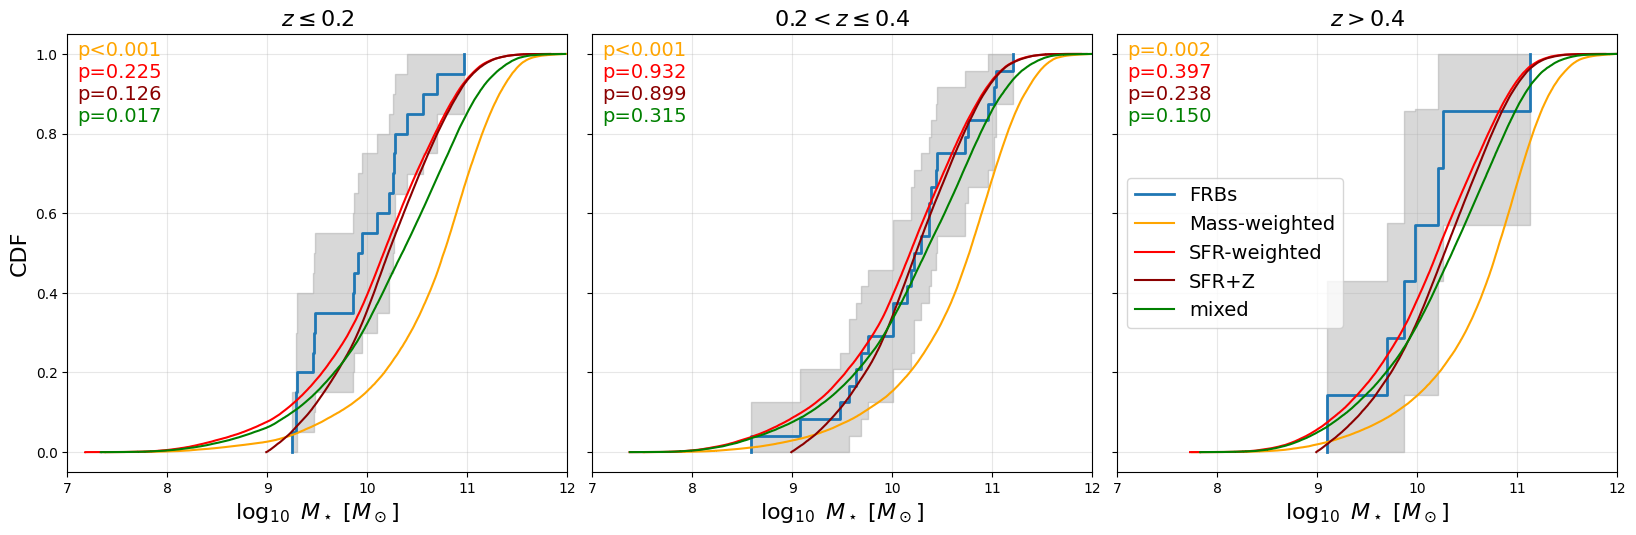

In [1172]:
''' CDF of mass-weighted and sfr-weighted masses '''
from scipy.stats import kstest
from statsmodels.distributions.empirical_distribution import ECDF


def add_bootstrap_cdf_uncertainty(ax, frbs_values, n_bootstraps=1000, ci=95):
    """Add grey-shaded uncertainty region to the FRBs CDF based on bootstrapping.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The axis on which to plot the CDF and uncertainty region.
    frbs_values : array-like
        The observed FRB values (e.g., log10 stellar masses or SFRs).
    n_bootstraps : int, optional
        Number of bootstrapped datasets to generate, by default 1000.
    ci : float, optional
        Confidence interval percentage, by default 95.
    """
    # Sort the FRB values
    frbs_values = np.sort(frbs_values)
    n_samples = len(frbs_values)

    # Generate bootstrapped datasets
    bootstrapped_cdfs = []
    for _ in range(n_bootstraps):
        # Sample with replacement
        bootstrapped_sample = np.random.choice(frbs_values, size=n_samples, replace=True)
        # Compute ECDF for the bootstrapped sample
        bootstrapped_cdf = ECDF(bootstrapped_sample)
        # Evaluate the CDF at the original x values
        bootstrapped_cdfs.append(bootstrapped_cdf(frbs_values))

    # Convert to numpy array for easier manipulation
    bootstrapped_cdfs = np.array(bootstrapped_cdfs)

    # Compute the lower and upper bounds of the CI
    lower_bound = np.percentile(bootstrapped_cdfs, (100 - ci) / 2, axis=0)
    upper_bound = np.percentile(bootstrapped_cdfs, 100 - (100 - ci) / 2, axis=0)

    # Create step-like x values
    step_x = np.repeat(frbs_values, 2)[1:-1]
    step_lower = np.repeat(lower_bound, 2)[1:-1]
    step_upper = np.repeat(upper_bound, 2)[1:-1]

    # Plot the shaded region for the CI
    ax.fill_between(step_x, step_lower, step_upper, color='grey', alpha=0.3, step='post')


def create_cdfs_of_4_models(ax, sub_hosts, z_samples, is_by_mass, title):

    # Create logpdfs for 4 models
    mass_logpdf = get_wlogpdf_w_opt(z_samples, prob_density, 1, 0)
    sfr_logpdf = get_wlogpdf_w_opt(z_samples, prob_density, 0, 1)
    z_sfr_logpdf = get_metallicity_logpdf(z_samples, prob_density)
    # best_fit_logpdf = get_wlogpdf_w_opt(z_samples, prob_density, 10**-9.62, 1)
    best_fit_logpdf = get_wlogpdf_w_opt(z_samples, prob_density, 1 * 10**-10.5, 1)

    # Generate samples
    model_samples = [mc.get_samples(logpdf) for logpdf in
                     [mass_logpdf, sfr_logpdf, z_sfr_logpdf, best_fit_logpdf]]

    # Create CDFs
    frbs_values = np.log10(sub_hosts['Mstar' if is_by_mass else 'SFR'])
    frbs_cdf = ECDF(frbs_values)

    samples_index = 0 if is_by_mass else 1
    models_cdfs = [ECDF(samples[:, samples_index]) for samples in model_samples]

    # Plot FRB hosts CDF
    ax.step(frbs_cdf.x, frbs_cdf.y, 
            label='FRBs', 
            linewidth=2,
            where='post')

    # Add bootstrap uncertainty
    add_bootstrap_cdf_uncertainty(ax, frbs_values)    
    
    # Plot models CDFs
    pvals = [kstest(frbs_values, cdf)[1] for cdf in models_cdfs]
    
    colors = ['orange', 'red', 'darkred', 'green']
    labels = ['Mass-weighted', 'SFR-weighted', 'SFR+Z', 'mixed']
    
    for i in range(4):
        ax.plot(models_cdfs[i].x, models_cdfs[i].y, color=colors[i], label=labels[i])
        ax.text(0.02, 0.95 - i * 0.05, 
                f'p={pvals[i]:.3f}' if pvals[i]>=0.001 else 'p<0.001',
                transform=ax.transAxes,  # Use axes coordinates
                color=colors[i],
                fontsize=14)
    
    ax.set_title(title, fontsize=16)
    xlim = [7, 12] if is_by_mass else [-3, 2]  # TODO: set ticks too?
    ax.set_xlim(xlim)
    ax.set_xlabel(r'$\log_{10}$ $M_\star$ [$M_\odot$]' if is_by_mass
                  else r'$\log_{10}$ SFR [$M_\odot yr^{-1}$]',
                  fontsize=16)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=14, loc='center left')


z1_hosts = frb_hosts[frb_hosts['z']<=0.2].reset_index()
z2_hosts = frb_hosts[np.logical_and(frb_hosts['z']>=0.2,
                                     frb_hosts['z']<0.4)].reset_index()
z3_hosts = frb_hosts[frb_hosts['z']>0.4].reset_index()

# Create figure with 3 subplots sharing y-axis
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# NOTE - add np.median(z_hosts['z']) result to extra_z list
is_by_mass = True
create_cdfs_of_4_models(ax1, z1_hosts, z_samples=0.25, is_by_mass=is_by_mass, title=r'$z\leq 0.2$')
create_cdfs_of_4_models(ax2, z2_hosts, np.median(z2_hosts['z']), is_by_mass, r'$0.2<z\leq 0.4$')
create_cdfs_of_4_models(ax3, z3_hosts, np.median(z3_hosts['z']), is_by_mass, r'$z>0.4$')

# Set common labels
ax1.set_ylabel('CDF', fontsize=16)

# Adjust layout
plt.subplots_adjust(bottom=0.15, wspace=0.05)

# Only show legend on last subplot
ax1.get_legend().remove()
ax2.get_legend().remove()

plt.savefig('Figures/Figure4_mass.pdf', bbox_inches='tight', transparent=True)
plt.show()


### Fraction of quiescent galaxies

In [ ]:
''' Prediction - based on best-fit background galaxies samples '''
import astropy.cosmology.units as cu
from astropy.cosmology import WMAP9 as cosmo

z = 0.5

best_fit_logpdf = get_wlogpdf_w_opt(z, prob_density, 1 * 10**-10.5, 1)
samples = mc.get_samples(best_fit_logpdf)

t_H = cosmo.age(z * cu.redshift).to('yr').value

# D_i = ( SFR_i / M_i ) * t_H(z)
# samples are in log10
D = 10**(samples[:, 1] - samples[:, 0]) * t_H

quiescent_frac = sum(D<1/20) / len(D)
star_forming_frac = sum(D>1/3) / len(D)

print("Quiescent fraction:", quiescent_frac)
print("Star-forming fraction:", star_forming_frac)

Quiescent fraction: 0.0872125
Star-forming fraction: 0.8426625
